In [3]:
from omero.gateway import BlitzGateway
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
import napari
import pandas as pd
from scipy import ndimage as ndi
from skimage import measure, exposure
from skimage.segmentation import clear_border
from skimage.morphology import remove_small_objects
# %run EdU_analysis_Ryan_0719.ipynb

In [ ]:
import os
list_dir=os.listdir('/Users/haoranyue/Documents/master_project/output_16')
print(len(list_dir))
for i in list_dir:
    print(i)
list_dir.remove('.DS_Store')

In [ ]:
import skimage
image1 = skimage.io.imread('/Users/haoranyue/Documents/master_project/output_cell/308843.tif')

In [ ]:
from PIL import Image
image1=Image.fromarray(image1*255).convert('L')

In [ ]:
from PIL import Image
import os
import numpy as np
list_diff=[]
def image_normal_0_1(object):
    object=np.float32(object)
    object = object / np.amax(object)
    object= np.clip(object, 0, 1)
    return object

def merge_three(path_1,path_2,path_3):
    list_dir_tubulins=os.listdir(path_1)
    list_dir_tubulins.remove('.DS_Store')
    for i in list_dir_tubulins:
        # image1 = Image.open(os.path.join(path_1,i))
        image1 =skimage.io.imread(os.path.join(path_1,i))
        # image1=image_normal_0_1(image1)
        image1=Image.fromarray(image1*255).convert('L')
        if os.path.exists(os.path.join(path_2,i))==True:
            image2= skimage.io.imread(os.path.join(path_2,i))
            # image2=image_normal_0_1(image2)
            image2=Image.fromarray(image2*255).convert('L')
            if os.path.exists(os.path.join(path_3,i))==True:
                image3= skimage.io.imread(os.path.join(path_2,i))
            # image3=image_normal_0_1(image3)
                image3=Image.fromarray(image3*255).convert('L')
                if image2.size[0]==image1.size[0]==image3.size[0]:
                    image = Image.merge("RGB", (image3, image1,image2 ))
                    image.save(os.path.join("/Users/haoranyue/Documents/master_project/output_all",i))
            else:
                print(list_diff.append(os.path.join(path_2,i)))
merge_three(path_1='/Users/haoranyue/Documents/master_project/output_cell',path_2='/Users/haoranyue/Documents/master_project/output_DAPI',path_3='/Users/haoranyue/Documents/master_project/output_Edu')

In [ ]:
from PIL import Image
image1=Image.open('/Users/haoranyue/Documents/master_project/Output_11/308843_16.tif')


In [ ]:
image2.mean()

In [ ]:
((np.float32(image1)-np.float32(image1).mean())/np.float32(image1).std()).mean()

In [ ]:
image2 = skimage.io.imread('/Users/haoranyue/Documents/master_project/Output_11/308843_16.tif')
            # image2=image_normal_0_1(image2)
image2 = Image.fromarray(image2).convert('L')
plt.figure(figsize=(10,10))
plt.imshow(image2)
plt.show

In [ ]:
np.float32(image2)

In [ ]:
def normalize(object):
    object = np.float32(object)
    img_mean=object.mean()
    img_std=object.std()
    image=(object-img_mean)/img_std
    return image
image_3=normalize(image2)
plt.figure(figsize=(10,10))
plt.imshow(image_3)
plt.show
image2

In [ ]:
import matplotlib.pyplot as plt
import skimage
image1=skimage.io.imread('/Users/haoranyue/Documents/master_project/output_17/308888_4.tif')

# image2=(np.float32(image1)-np.float32(image1).mean())/np.float32(image1).std()
plt.figure(figsize=(10,10))
plt.imshow((image1/65535)*255)
plt.show()


In [ ]:
image1.min()

In [7]:
from PIL import Image
import os
import numpy as np
import skimage

list_diff = []


def normalize(object):
    object = np.float32(object)
    img_mean=object.mean()
    img_std=object.std()
    image=(object-img_mean)/img_std
    return image

def normalize_0_1(data):
     return (data-np.min(data))/(np.max(data)-np.min(data))

def merge_two(path_1, path_2):
    list_dir_tubulins = os.listdir(path_1)
    # list_dir_tubulins.remove('.DS_Store')
    print(list_dir_tubulins)
    for i in list_dir_tubulins:

        # image1 = Image.open(os.path.join(path_1,i))
        image1 = skimage.io.imread(os.path.join(path_1, i))
        image1=normalize_0_1(image1)
        image1 = Image.fromarray((image1)*255).convert('L')
        if os.path.exists(os.path.join(path_2, i) )== True:
            image2 = skimage.io.imread(os.path.join(path_2, i))
            image2=normalize_0_1(image2)
            image2 = Image.fromarray((image2)*255).convert('L')
            empty = Image.new(mode='L', size=image1.size)
            if image2.size[0] == image1.size[0]:
                image = Image.merge("RGB", (empty, image1, image2))
                image.save(os.path.join("/Users/haoranyue/Documents/master_project/output_18", i))
        else:
            print(list_diff.append(os.path.join(path_2, i)))


# merge_two(path_1='/Users/haoranyue/Desktop/RPE-1_10000_Flatfield_Corr_814/3',
#           path_2='/Users/haoranyue/Desktop/RPE-1_10000_Flatfield_Corr_814/0')

# merge_two(path_1='/Users/haoranyue/Documents/master_project/output_16',
#           path_2='/Users/haoranyue/Documents/master_project/output_17')

In [ ]:
import skimage
image1=skimage.io.imread('/Users/haoranyue/Documents/master_project/output_18/308790_176.tif')
image1[:,:,1]

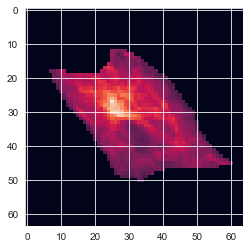

In [137]:
import matplotlib.pyplot as plt
plt.imshow(image1[:,:,1])
# plt.imshow(image1)

In [7]:
import numpy as np
x = np.arange(16)
x = x.reshape((4, 4))
print(x)

x=(x>5)*np.ones_like(x)
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 0 0 0]
 [0 0 1 1]
 [1 1 1 1]
 [1 1 1 1]]


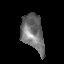

In [118]:
image1=Image.fromarray(normalize_0_1(image1[:,:,1])*255).convert('L',colors=65535)
image1

In [1]:
import numpy as np
import cv2
import os
import skimage
def merge_two(path_1, path_2,path_3):
    list_dir_tubulins = os.listdir(path_1)
    # list_dir_tubulins.remove('.DS_Store')
    print(list_dir_tubulins)
    for i in list_dir_tubulins:

        # image1 = Image.open(os.path.join(path_1,i))
        image1 = skimage.io.imread(os.path.join(path_1, i))
        # image1=normalize_0_1(image1)
        if os.path.exists(os.path.join(path_2, i) )== True:
            image2 = skimage.io.imread(os.path.join(path_2, i))
            # image2=normalize_0_1(image2)

            # empty = np.zeros((image2.shape[0], image1.shape[1],))
            image3=skimage.io.imread(os.path.join(path_3, i))

            if image2.shape[0] == image1.shape[1]:
                print(image2.shape)
                needed_multi_channel_img = np.zeros((image1.shape[0], image1.shape[1], 3))
                needed_multi_channel_img [:,:,0] = image3
                needed_multi_channel_img [:,:,1] = image1
                needed_multi_channel_img [:,:,2] = image2

                skimage.io.imsave(os.path.join("/Users/haoranyue/Documents/master_project/output_18/", i),needed_multi_channel_img)
        else:
            print(list_diff.append(os.path.join(path_2, i)))

merge_two(path_1='/Users/haoranyue/Documents/master_project/output_16',
          path_2='/Users/haoranyue/Documents/master_project/output_17',
          path_3='/Users/haoranyue/Documents/master_project/output_16_1'
          )
# merge_two(path_1='/Users/haoranyue/Desktop/RPE-1_10000_Flatfield_Corr_814/3/',
#           path_2='/Users/haoranyue/Desktop/RPE-1_10000_Flatfield_Corr_814/0/',
#           )


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(

In [11]:
import skimage
image_1=skimage.io.imread('/Users/haoranyue/Desktop/image001.png')

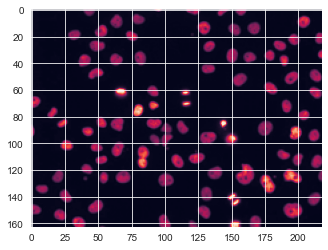

In [4]:
plt.imshow(image_1[:,:,0])

In [30]:
from cellpose import core, utils, io, models, metrics
# nuclei_DAPI_model_path='/Users/haoranyue/PycharmProjects/pythonProject/DPAI_813/models/nuclei_DAPI'


n_model = models.CellposeModel(gpu=False, model_type = 'CPX')
n_channels = [0,0]
n_masks, n_flows, n_styles = n_model.eval(image_1, diameter=30, channels=n_channels)


In [13]:
import torch
a=torch.tensor([[0.9962, 0.2621, 0.0000, 0.0011]])
a.softmax(dim=1)

tensor([[0.4507, 0.2163, 0.1664, 0.1666]])

In [9]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(1, 4).softmax(dim=1)

In [8]:
target

tensor([[-0.7119,  2.1124,  0.2976, -0.6201]])

In [10]:
target

tensor([[0.5668, 0.1646, 0.1064, 0.1623]])

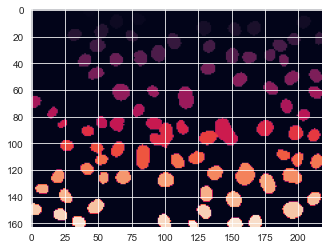

In [29]:
plt.imshow(n_masks)
